In [44]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras.backend as K
from tensorflow import keras
from keras.layers import Reshape, Conv2DTranspose, PReLU
from keras.utils import to_categorical, plot_model
from keras.layers import Concatenate
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.image import resize
from scipy.linalg import sqrtm
import math
import tensorflow as tf
from IPython.display import clear_output, HTML
import glob
from keras.layers import AveragePooling2D, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Add
from keras.layers import Normalization, Dense, Conv2D, Dropout, BatchNormalization, ReLU
from keras.models import Sequential, Model
from keras import Input
from keras.optimizers import *
from keras.callbacks import EarlyStopping
from keras.initializers import RandomNormal
from keras.layers import LeakyReLU, GlobalMaxPooling2D, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from skimage.transform import AffineTransform, warp
from keras import Sequential, Model
from keras.layers import Dense, Conv2D, Reshape, UpSampling2D, \
    BatchNormalization, Activation, Input, LeakyReLU, ZeroPadding2D, Dropout, Flatten, Conv2DTranspose
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import rotate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, UpSampling2D, Conv2D, BatchNormalization, Activation, Input, LeakyReLU
from keras.initializers import RandomNormal
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout

In [45]:
sns.set(style='darkgrid', palette='deep')

In [46]:
# List physical GPUs and set memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [47]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('emnist-letters-train.csv', delimiter=',', header=None)

In [48]:
df.rename(columns={0: 'labels'}, inplace=True)

In [49]:
df = df[df['labels'] != -1]


In [50]:
# Convert the DataFrame to a NumPy array
data = df.to_numpy()

# Extract the labels and images from the NumPy array
labels = data[:, 0]  # Assuming the first column is the labels
images = data[:, 1:]  # The rest are the images

# Optionally, you can reshape and normalize the images if needed
# For example, if the images are 28x28 pixels
images = images.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, 28, 28, 1)
images = images / 255.0  # Normalize to [0, 1]

# Define the mapping dictionary
mapping = {1: 97, 2: 98, 3: 99, 4: 100, 5: 101, 6: 102, 7: 103, 8: 104, 9: 105, 
           10: 106, 11: 107, 12: 108, 13: 109, 14: 110, 15: 111, 16: 112, 17: 113, 
           18: 114, 19: 115, 20: 116, 21: 117, 22: 118, 23: 119, 24: 120, 25: 121, 
           26: 122, 27: 123}

# Re-map the labels using the mapping dictionary
mapped_labels = np.vectorize(mapping.get)(labels)

# Convert the mapped labels to characters
labels = np.vectorize(chr)(mapped_labels)

# Now 'images' and 'labels' are NumPy arrays ready for use
print(images.shape)
print(labels.shape)


(88800, 28, 28, 1)
(88800,)


In [51]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [52]:
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (56832, 28, 28, 1)
Validation set shape: (14208, 28, 28, 1)
Test set shape: (17760, 28, 28, 1)


In [53]:
unique_labels = np.unique(y_train)

In [1]:
unique_labels = np.unique(y_train)
def Show_Images(data,unique_labels,labels):
    # Create the plot with sufficient subplots
    fig, axes = plt.subplots(3, 9, figsize=(20, 8))  # Adjusted to 3 rows and 9 columns for demonstration
    axes = axes.flatten()

    for label, ax in zip(unique_labels, axes):
        # Select the first image for each unique label
        idx = np.where(labels == label)[0][0]
        image = data[idx].reshape(28, 28)
        
        # Display the image
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')

    # Hide any remaining empty subplots (if any)
    for ax in axes[len(unique_labels):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

Show_Images(X_train,unique_labels,y_train)

NameError: name 'np' is not defined

<hr>
<h3>Viewing Augmented vs Actual</h3>
    <h4><li>Rotate</li>
    <li>Flip</li></h4>
<hr>

In [55]:
def plot_images_per_label_Aug_sheer(images, labels, num_images_per_label=5):
    unique_labels = np.unique(labels)
    
    # Create the plot with sufficient subplots
    fig, axes = plt.subplots(len(unique_labels), num_images_per_label * 2, figsize=(20, len(unique_labels) * 2))
    axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

    # Counter for current axis
    ax_index = 0

    for label in unique_labels:
        # Filter images for the current label
        indices = np.where(labels == label)[0]
        
        # Loop through up to num_images_per_label images for the current label
        for i in range(min(num_images_per_label, len(indices))):
            image = images[indices[i]].reshape(28, 28)
            
            # Display the original image
            axes[ax_index].imshow(image, cmap='gray')
            axes[ax_index].set_title(f'Label: {label}')
            axes[ax_index].axis('off')
            ax_index += 1

            if ax_index >= len(axes):
                break

        for i in range(min(num_images_per_label, len(indices))):
            image = images[indices[i]].reshape(28, 28)

            # Rotate the image by 15 degrees
            rotated_image = rotate(image, -90, reshape=False)
            
            # Apply shear transformation
            # shear_transform = AffineTransform(shear=0.2)
            # sheared_image = warp(rotated_image, shear_transform.inverse, mode='wrap')
            flipped_image = np.fliplr(rotated_image)

            # Display the augmented image
            axes[ax_index].imshow(flipped_image, cmap='gray')
            axes[ax_index].set_title(f'Labels Augmented: {label}')
            axes[ax_index].axis('off')
            ax_index += 1

            if ax_index >= len(axes):
                break

    # Hide any remaining empty subplots (if any)
    for ax in axes[ax_index:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [56]:
# plot_images_per_label_Aug_sheer(X_train, y_train)

<hr>
<h3>Data Preprocessing to make iamges look like actual Alphabets</h3>
<hr>

In [57]:
augmented_images = []
for image in images:
    rotated_image = rotate(image, 90, reshape=False)
    flipped_image = np.flipud(rotated_image)  # Flip vertically
    augmented_images.append(flipped_image)

In [58]:
augmented_images = np.array(augmented_images)

In [59]:
# Split the data into train and test sets
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_images, labels, test_size=0.2, random_state=42)
X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_train_aug, y_train_aug, test_size=0.2, random_state=42)

In [60]:
# Show_Images(augmented_images,unique_labels)

In [61]:
def plot_images_per_label(images, augmented_images, labels, num_images_per_label=5):
    unique_labels = np.unique(labels)
    
    # Create the plot with sufficient subplots
    fig, axes = plt.subplots(len(unique_labels), num_images_per_label * 2, figsize=(20, len(unique_labels) * 2))
    axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

    # Counter for current axis
    ax_index = 0

    for label in unique_labels:
        # Filter images for the current label
        indices = np.where(labels == label)[0]
        
        # Loop through up to num_images_per_label images for the current label
        for i in range(min(num_images_per_label, len(indices))):
            original_image = images[indices[i]].reshape(28, 28)
            augmented_image = augmented_images[indices[i]].reshape(28, 28)

            # Display the original image
            axes[ax_index].imshow(original_image, cmap='gray')
            axes[ax_index].set_title(f'Label: {label}')
            axes[ax_index].axis('off')
            ax_index += 1

            if ax_index >= len(axes):
                break

        for i in range(min(num_images_per_label, len(indices))):
            augmented_image = augmented_images[indices[i]].reshape(28, 28)

            # Display the augmented image
            axes[ax_index].imshow(augmented_image, cmap='gray')
            axes[ax_index].set_title(f'Label Augmented: {label}')
            axes[ax_index].axis('off')
            ax_index += 1

            if ax_index >= len(axes):
                break

    # Hide any remaining empty subplots (if any)
    for ax in axes[ax_index:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

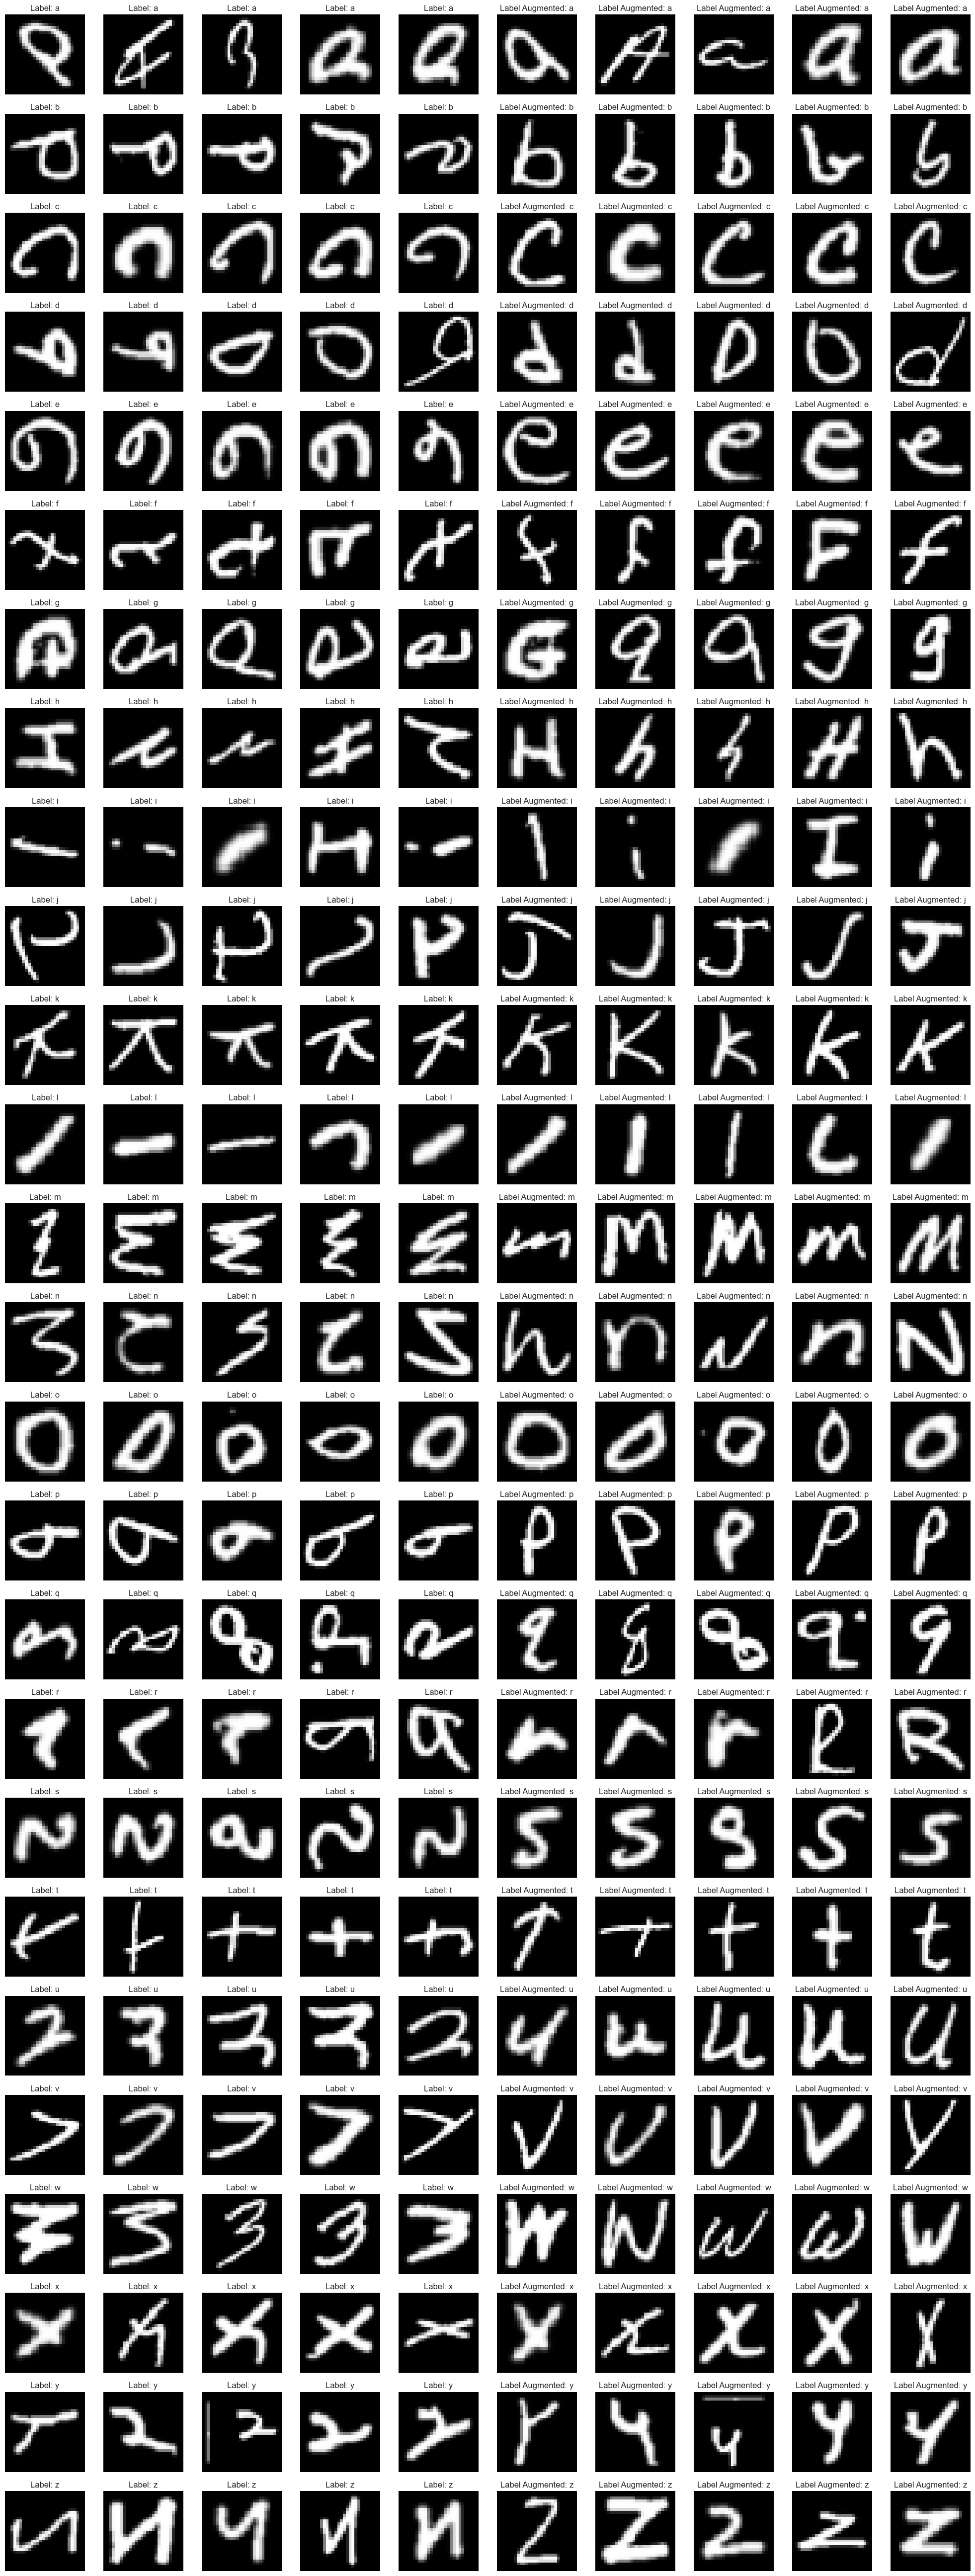

In [62]:
plot_images_per_label(images, augmented_images, labels)

In [63]:
# class DCGAN():
    
#     # this is the function to build the generator neural network
#     def build_generator(self):
#         model = Sequential(name='Generator')
#         model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim)) # connect the input to dense layer
#         model.add(Reshape((7, 7, 128)))
#         # upsample from 7*7 to 14*14
#         model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
#         model.add(LeakyReLU(alpha=0.2))
#         # upsample to 28x28
#         model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Conv2D(self.channels, kernel_size=7, padding="same", activation='sigmoid'))
#         model.summary()
#         noise = Input(shape=(self.latent_dim,))
#         img = model(noise)
#         return Model(noise, img)  # the keras Model class groups layers into an object with training and inference features
    
#     def build_discriminator(self):
#         model = Sequential(name='Discriminator')
#         model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Dropout(0.4))
#         model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Dropout(0.4))
#         model.add(Flatten())
#         model.add(Dense(1, activation='sigmoid'))
#         model.summary()
#         img = Input(shape=self.img_shape)
#         validity = model(img)
#         return Model(img, validity)

#     def __init__(self, rows, cols, channels, z = 100):
#         # Input shape
#         self.img_rows = rows  # generated image height
#         self.img_cols = cols  # generated image width
#         self.channels = channels  # generated image channel
#         self.img_shape = (self.img_rows, self.img_cols, self.channels)
#         self.latent_dim = z  # the input is 1-D vector of noise
#         # Reduce learning rate from 0.001 to 0.0002, and beta1 from 0.9 to 0.5, which can stablize training and reduce oscillation
#         optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
#         # Build and compile the discriminator
#         self.discriminator = self.build_discriminator()
#         self.discriminator.compile(loss='binary_crossentropy',
#             optimizer=optimizer,
#             metrics=['accuracy'])
#         # Build the generator
#         self.generator = self.build_generator()
#         # The generator takes noise as input and generates images
#         z = Input(shape=(self.latent_dim,))
#         img = self.generator(z)
#         # For the combined model we will only train the generator
#         self.discriminator.trainable = False
#         # The discriminator takes generated images as input and determines validity
#         valid = self.discriminator(img)
#         # The combined model (stacked generator and discriminator)
#         # Trains the generator to fool the discriminator
#         self.combined = Model(z, valid)
#         self.combined.compile(loss='binary_crossentropy',
#             optimizer=optimizer)
    
#     def train(self, epochs, batch_size=128, save_interval=50):
#         # Split the data into train and test sets
#         X_train = augmented_images
#         # Rescale 0 to 1
#         X_train = X_train / 255
#         X_train = np.expand_dims(X_train, axis=3)
#         # Adversarial ground truths
#         valid = np.ones((batch_size, 1))
#         fake = np.zeros((batch_size, 1))
#         for epoch in range(epochs):

#             # Select a random half of images
#             idx = np.random.randint(0, X_train.shape[0], batch_size)
#             imgs = X_train[idx]
#             # Sample noise and generate a batch of new images
#             noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
#             gen_imgs = self.generator.predict(noise)
#             # Train the discriminator (it classify real images as 1 and generated images as 0)
#             d_loss_real = self.discriminator.train_on_batch(imgs, valid)
#             d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
#             d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
#             # Train the generator (it wants discriminator to predict generated images as 1)
#             g_loss = self.combined.train_on_batch(noise, valid)
#             # Plot the progress
#             print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            
#             # If at save interval => save generated image samples
#             if epoch % save_interval == 0:
#                 self.save_imgs(epoch)
    
#     def save_imgs(self, epoch):
#         r, c = 5, 5
#         noise = np.random.normal(0, 1, (r * c, self.latent_dim))
#         gen_imgs = self.generator.predict(noise)

#         # Rescale images 0 - 1
#         # gen_imgs = 0.5 * gen_imgs + 0.5

#         fig, axs = plt.subplots(r, c)
#         cnt = 0
#         for i in range(r):
#             for j in range(c):
#                 axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
#                 axs[i,j].axis('off')
#                 cnt += 1
#         os.makedirs('generated_mnist', exist_ok=True)
#         fig.savefig("generated_mnist/dcgan_mnist_improved_{:d}.png".format(epoch))
#         plt.close()

In [64]:
# dcgan = DCGAN(28,28,1)
# dcgan.train(epochs=200, batch_size=64, save_interval=50)

In [65]:
class DCGAN():
    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        optimizer = Adam(0.000001, 0.25)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated images as input and
        # determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',
        optimizer=optimizer)

    def build_generator(self):
        model = Sequential()
        
        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim, kernel_initializer=RandomNormal(0, 0.02)))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        
        model.add(Conv2D(128, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(UpSampling2D())
        
        model.add(Conv2D(128, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2D(64, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2D(64, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2D(self.channels, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(Activation("tanh"))
        
        model.summary()
        
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        
        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()
        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)


    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_mnist', exist_ok=True)
        fig.savefig("generated_mnist/dcgan_mnist_improved_{:d}.png".format(epoch))
        plt.close()
        
    def train(self, epochs, batch_size=128, save_interval=50):
        # Load the dataset
        X_train = images
        # Rescale -1 to 1
        X_train = X_train / 127.5 + 1
        X_train = np.expand_dims(X_train, axis=3)
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        for epoch in range(epochs):
            # ---------------------
            # Train Discriminator
            # ---------------------
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            # Train the discriminator (real classified as ones
            # and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            # ---------------------
            # Train Generator
            # ---------------------
            # Train the generator (wants discriminator to mistake
            # images as real)
            g_loss = self.combined.train_on_batch(noise, valid)
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

In [66]:
# dcgan = DCGAN(28,28,1)
# dcgan.train(epochs=5000, batch_size=256, save_interval=50)

In [68]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=26):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_classes=26):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = 7 * 7
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((7, 7, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((7, 7, 128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load fashion mnist images
def load_real_samples():
	# load dataset
	trainX = X_train_aug
	trainy = y_train_aug
	# expand to 3d, e.g. add channels
	X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return [X, trainy]

# # select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = augmented_images,labels
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=26):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('cgan_generator.h5')

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

c:\Users\user\anaconda3\envs\gpu_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


UnboundLocalError: local variable 'labels' referenced before assignment